# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import chi2
from sklearn.exceptions import NotFittedError


# modelado
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:
etiquetas_de_columnas = df.columns[:100]
print(etiquetas_de_columnas)

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop', '40-49',
       '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop',
       '60-69', '60-69 y/o % of total pop', '70-79',
       '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop',
       'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
       'Native American/American Indian-alone pop', '% NA/AI-alone',
       'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
       'R_NET_MIG_2018', 'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       '

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [5]:
columnas_tipo_objeto = df.select_dtypes(include=['object'])
columnas_tipo_objeto

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


In [6]:
print("------------------------(1). ACA EMPIEZA LA LIMPIEZA DE LOS DATOS---------------------------------\n")

------------------------(1). ACA EMPIEZA LA LIMPIEZA DE LOS DATOS---------------------------------



In [7]:
print("------------------------(2). REVISAMOS SI HAY DATOS DUPLICADOS----------------------------\n")
duplicados = df.duplicated()
numero_de_duplicados = duplicados.sum()
print(f"LOS NUMEROS DUPLICADOS DEL DATASET SON: {numero_de_duplicados}")

------------------------(2). REVISAMOS SI HAY DATOS DUPLICADOS----------------------------

LOS NUMEROS DUPLICADOS DEL DATASET SON: 0


In [8]:
print("------(3). CONTAMOS CUANTOS NaN EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS------\n") 
nan_counts = df.isnull().sum() 
print("CONTEO DE LOS 'NaN' POR COLUMNAS:") 
nan_counts

------(3). CONTAMOS CUANTOS NaN EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS------

CONTEO DE LOS 'NaN' POR COLUMNAS:


fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [9]:
print("------------------(4). REVISAMOS CUANTAS COLUMNAS TIENEN NaN-----------------\n")
nan_columns_count = df.isna().any().sum() 
print("Número de columnas con al menos un NaN:",nan_columns_count)

------------------(4). REVISAMOS CUANTAS COLUMNAS TIENEN NaN-----------------

Número de columnas con al menos un NaN: 0


In [10]:
print("--------------------(5). IDENTIFICAMOS VALORES FALTANTES-------------------------------\n")
Valores_faltantes = df.isna().sum() 
print("Valores faltantes por columna:\n", Valores_faltantes)

--------------------(5). IDENTIFICAMOS VALORES FALTANTES-------------------------------

Valores faltantes por columna:
 fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


In [11]:
print("-----------------(6). IDENTIFICAMOS LAS COLUMNAS NUMERICAS-------------------\n")
columnas_numericas = df.select_dtypes(include=['number']).columns 
print("Variables numéricas:") 
print(columnas_numericas)

-----------------(6). IDENTIFICAMOS LAS COLUMNAS NUMERICAS-------------------

Variables numéricas:
Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=106)


In [12]:
# Obtener columnas que contienen 'prevalence' en su nombre 
prevalence_columns = [col for col in df.columns if 'prevalence' in col] 
print("Columnas que contienen 'prevalence':") 

print(prevalence_columns)

Columnas que contienen 'prevalence':
['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']


TENIENDO EN EN CUENTA QUE TOMARÈ COMO VARIABLE OBJETIVO LA PREVALENCIA DE LA DIABETES EN LA POBLACION, DEFINO VARIABLES SOCIODEMOGRAFICAS Y RECURSOS DE LA SALUD QUE CREO ESTÀN ESTRECHAMENTE RELACIONADAS:

FACTORES SOCIODEMOGRÁFICOS:
•	TOT_POP: TOTAL DE LA POBLACIÓN.
•	MEDHHINC_2018: INGRESO MEDIO DEL HOGAR EN 2018.
•	PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA 2014-18: PORCENTAJE DE ADULTOS SIN DIPLOMA DE ESCUELA SECUNDARIA.
•	PERCENT OF ADULTS WITH A BACHELOR'S DEGREE OR HIGHER 2014-18: PORCENTAJE DE ADULTOS CON TÍTULO UNIVERSITARIO O SUPERIOR.
•	PCTPOVALL_2018: PORCENTAJE DE LA POBLACIÓN TOTAL EN POBREZA EN 2018.
•	UNEMPLOYMENT_RATE_2018: TASA DE DESEMPLEO EN 2018.

RECURSOS DE SALUD:
•	ACTIVE PHYSICIANS PER 100000 POPULATION 2018 (AAMC): MÉDICOS ACTIVOS POR CADA 100,000 HABITANTES EN 2018.
•	TOTAL ACTIVE PATIENT CARE PHYSICIANS PER 100000 POPULATION 2018 (AAMC): MÉDICOS ACTIVOS DE ATENCIÓN AL PACIENTE POR CADA 100,000 HABITANTES EN 2018.
•	ACTIVE PRIMARY CARE PHYSICIANS PER 100000 POPULATION 2018 (AAMC): MÉDICOS DE ATENCIÓN PRIMARIA ACTIVOS POR CADA 100,000 HABITANTES EN 2018.
•	TOTAL NURSE PRACTITIONERS (2019): TOTAL DE ENFERMEROS PRACTICANTES EN 2019.
•	TOTAL HOSPITALS (2019): TOTAL DE HOSPITALES EN 2019.
•	ICU BEDS_X: CAMAS DE UCI.



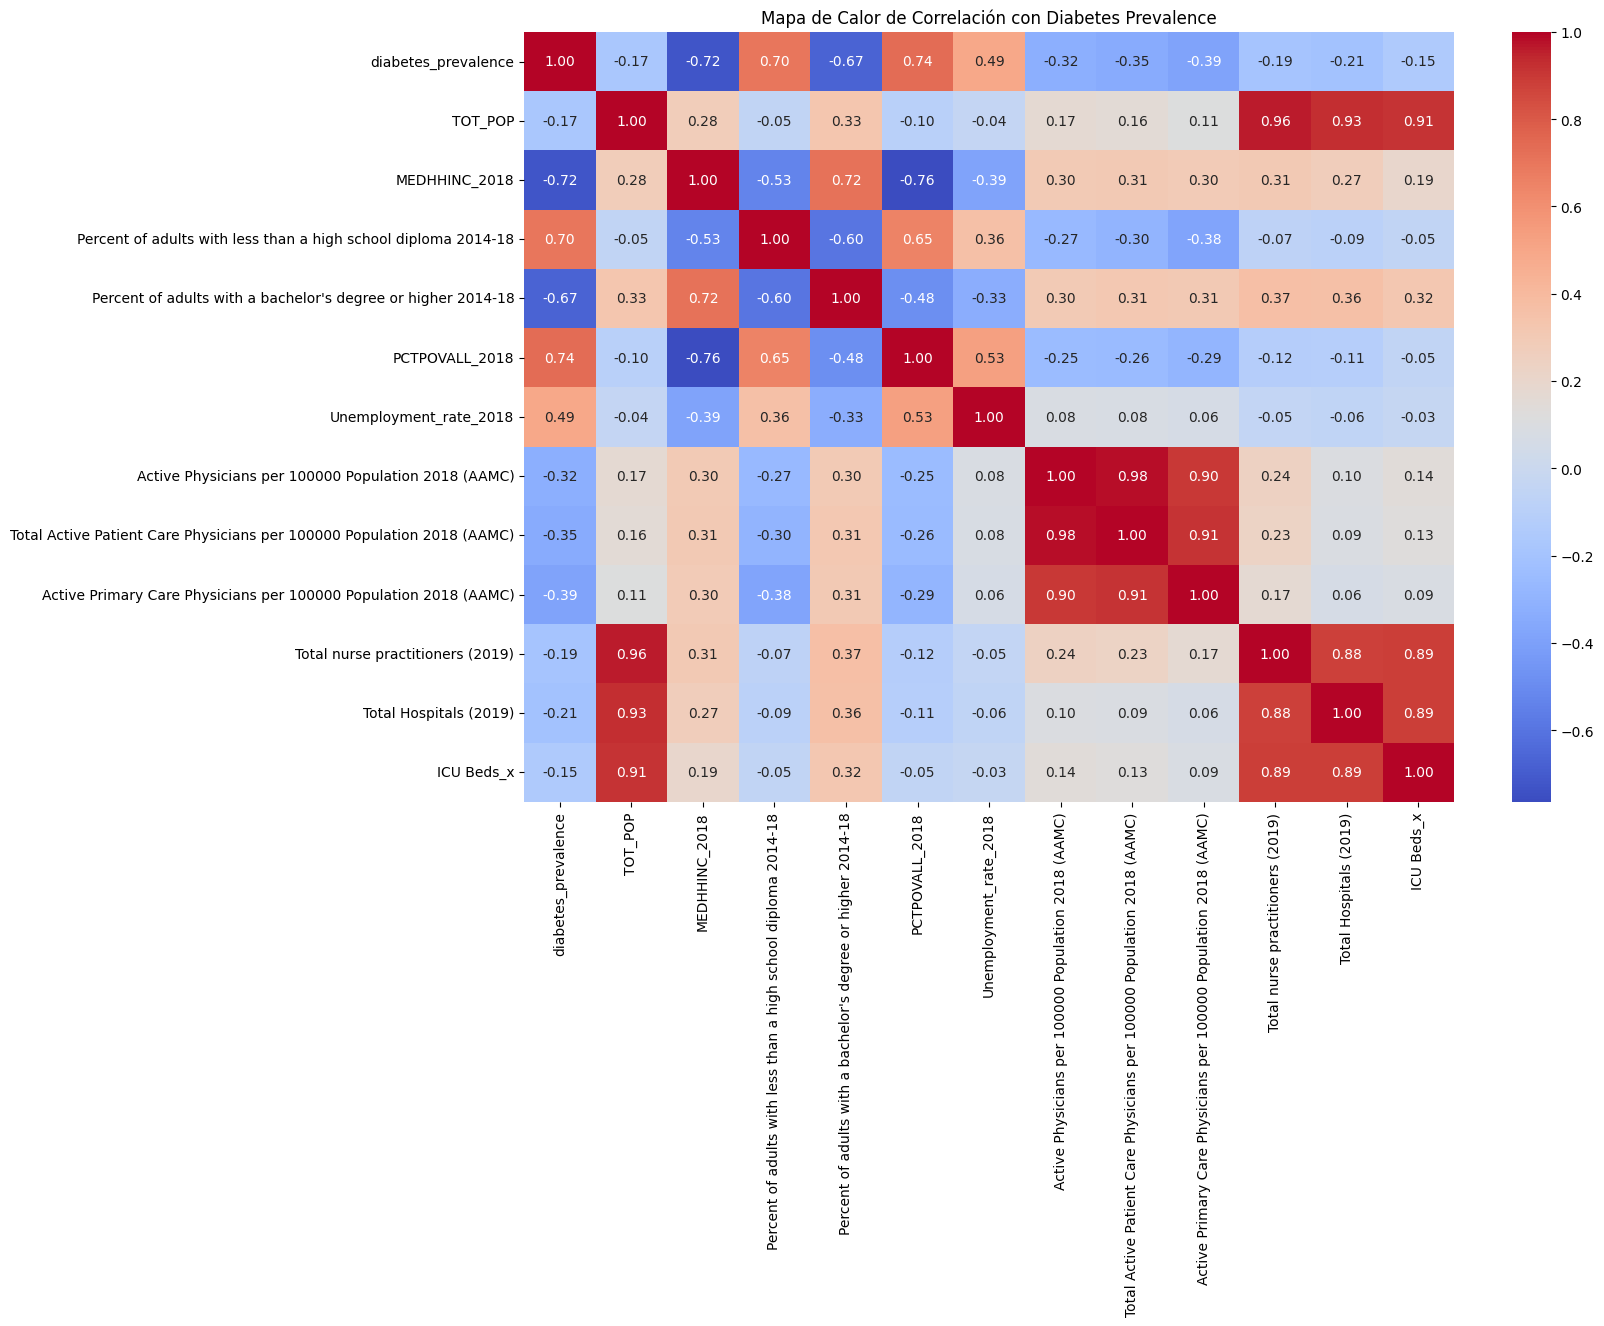

In [13]:

# Seleccionar las columnas relevantes
columnas_seleccionadas = [
    'diabetes_prevalence', 'TOT_POP', 'MEDHHINC_2018',
    'Percent of adults with less than a high school diploma 2014-18',
    'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Active Physicians per 100000 Population 2018 (AAMC)',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Total nurse practitioners (2019)', 'Total Hospitals (2019)',
    'ICU Beds_x'
]

# Filtrar el DataFrame para solo incluir las columnas seleccionadas
df_deleccionado = df[columnas_seleccionadas]

# Calcular la matriz de correlación
matrix_de_correlacion = df_deleccionado.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación con Diabetes Prevalence')
plt.show()


EXISTE UNA FUERTE RELACION DEL PORCENTAJE TOTAL DE LA POBLACION EN EL 2018 Y LOS INGRESOS MEDIOS DEL
HOGAR EN EL 2018. TAMBIÈN EXISTE UNA FUERTE RELACION CON LOS MEDICOS ACTIVOS EN EL 2018 Y LOS MEDICOS ACTIVOS DE ATENCIÒN AL PACIENTE PARA EL MISMO AÑO.

In [14]:
print("----------------(7). ORDENAMOS LAS COLUMNAS CON LOS VALORES NULOS-----------------\n")
df.isnull().sum().sort_values(ascending=False)


----------------(7). ORDENAMOS LAS COLUMNAS CON LOS VALORES NULOS-----------------



fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [15]:
print("-----------------(8). ELIMINAMOS LAS COLUMNAS NO NECESARIAS---------------\n")
df.drop(["fips", "STATE_FIPS", "CNTY_FIPS","COUNTY_NAME", "STATE_NAME"], axis = 1, inplace = True)
df.head()

-----------------(8). ELIMINAMOS LAS COLUMNAS NO NECESARIAS---------------



,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,3038,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,7474,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [16]:
print("----------------(9). DETECTAMOS LA CANTIDAD DE OUTLIERS QUE TENEMOS POR COLUMNA--------------\n")

# Función para detectar outliers usando el método IQR
def identificacion_outliers(df, columns):
    contador = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3.0 * IQR
        upper_bound = Q3 + 3.0 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        contador[col] = outliers.shape[0]
    return contador

# Seleccionar las columnas numéricas
columnas_tipo_numericas = df.select_dtypes(include=['number']).columns

# Detectar y contar los outliers en cada columna numérica
contador = identificacion_outliers(df, columnas_tipo_numericas)

# Crear un DataFrame a partir del diccionario de conteo de outliers
contador_de_outliers = pd.DataFrame(list(contador.items()), columns=['Columna', 'Total Outliers'])

# Ordenar el DataFrame por el total de outliers de mayor a menor
contador_de_outliers = contador_de_outliers.sort_values(by='Total Outliers', ascending=False)

# Mostrar el DataFrame ordenado
contador_de_outliers


----------------(9). DETECTAMOS LA CANTIDAD DE OUTLIERS QUE TENEMOS POR COLUMNA--------------



,Columna,Total Outliers
25,Asian-alone pop,425
32,N_POP_CHG_2018,384
43,Bachelor's degree or higher 2014-18,344
27,Hawaiian/Pacific Islander-alone pop,340
73,ICU Beds_x,337
...,...,...
90,COPD_prevalence,0
87,Heart disease_Lower 95% CI,0
88,Heart disease_Upper 95% CI,0
96,diabetes_Upper 95% CI,0


In [17]:
print("--------------(10). CONTEO DE OUTLIERS SUPERIORES DE CADA ATRIBUTO---------------\n")


def calculate_limits_and_count_outliers(df, columns):
    limits = {}
    outliers_count = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3.0 * IQR
        upper_bound = Q3 + 3.0 * IQR
        
        outliers = df[df[col] > upper_bound]
        limits[col] = {'Limite inferior': lower_bound, 'Limite superior': upper_bound}
        outliers_count[col] = outliers.shape[0]
        
    return limits, outliers_count

# Seleccionar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Calcular límites y contar outliers superiores
limits, outliers_count = calculate_limits_and_count_outliers(df, numeric_columns)

# Crear DataFrames para los límites y el conteo de outliers
limits_df = pd.DataFrame.from_dict(limits, orient='index')
outliers_count_df = pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Outliers Superiores'])

# Mostrar los DataFrames
print("Límites Inferior y Superior de Cada Atributo:")
print(limits_df)
print("\nConteo de Outliers Superiores de Cada Atributo:")


limits_df, outliers_count_df


--------------(10). CONTEO DE OUTLIERS SUPERIORES DE CADA ATRIBUTO---------------

Límites Inferior y Superior de Cada Atributo:
                          Limite inferior  Limite superior
TOT_POP                    -159886.000000    238762.250000
0-9                         -19169.000000     28546.500000
0-9 y/o % of total pop           3.523037        20.023442
19-Oct                      -20968.750000     31165.500000
10-19 y/o % of total pop         5.720168        19.613618
...                                   ...              ...
CKD_prevalence                   1.000000         5.900000
CKD_Lower 95% CI                 1.100000         5.300000
CKD_Upper 95% CI                 0.900000         6.500000
CKD_number                   -4069.750000      6160.750000
Urban_rural_code                -6.000000        15.000000

[103 rows x 2 columns]

Conteo de Outliers Superiores de Cada Atributo:


(                          Limite inferior  Limite superior
 TOT_POP                    -159886.000000    238762.250000
 0-9                         -19169.000000     28546.500000
 0-9 y/o % of total pop           3.523037        20.023442
 19-Oct                      -20968.750000     31165.500000
 10-19 y/o % of total pop         5.720168        19.613618
 ...                                   ...              ...
 CKD_prevalence                   1.000000         5.900000
 CKD_Lower 95% CI                 1.100000         5.300000
 CKD_Upper 95% CI                 0.900000         6.500000
 CKD_number                   -4069.750000      6160.750000
 Urban_rural_code                -6.000000        15.000000
 
 [103 rows x 2 columns],
                           Outliers Superiores
 TOT_POP                                   280
 0-9                                       294
 0-9 y/o % of total pop                     14
 19-Oct                                    288
 10-19 y/o % of to

In [18]:
print("-----------------(11). DIVIDIMOS EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA---------------\n")
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("diabetes_prevalence", axis = 1)
y = df["diabetes_prevalence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

-----------------(11). DIVIDIMOS EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA---------------



,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,...,COPD_Upper 95% CI,COPD_number,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,2831,...,13.0,2314,12.6,14.9,2823,3.8,3.5,4.1,771,6
2302,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,5880,...,11.5,4097,11.9,14.2,5416,3.5,3.2,3.8,1454,5
761,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,4451,...,10.4,2792,11.2,13.1,3698,2.9,2.7,3.1,871,2
2194,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,11444,...,9.3,5716,10.4,12.0,7913,3.0,2.8,3.2,2118,3
1241,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,15845,...,11.0,10002,11.7,13.4,12987,3.4,3.2,3.6,3490,4


In [19]:
print("-----------(12). IDENTIFICAMOS Y ESCALAMOS LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----\n")
# Identificar las variables numéricas automáticamente, excluyendo 'diabetes_prevalence' 
variables_numericas = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'diabetes_prevalence']

# Instanciar el escalador
scaler = StandardScaler()

# Entrenar el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# Aplicar el escalador en los datos de entrenamiento
X_train_final = scaler.transform(X_train[variables_numericas])
X_train_final = pd.DataFrame(X_train_final, index=X_train.index, columns=variables_numericas)

# Aplicar el escalador en los datos de prueba
X_test_final = scaler.transform(X_test[variables_numericas])
X_test_final = pd.DataFrame(X_test_final, index=X_test.index, columns=variables_numericas)

# Mostrar las primeras filas de los datos escalados de entrenamiento
print(X_train_final.head())


-----------(12). IDENTIFICAMOS Y ESCALAMOS LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----

       TOT_POP       0-9  0-9 y/o % of total pop    19-Oct  \
1292 -0.229763 -0.225393                0.102383 -0.231350   
2302 -0.161280 -0.179851               -0.754597 -0.181109   
761  -0.198764 -0.209983               -0.717144 -0.195009   
2194 -0.048115 -0.049041                0.120407 -0.029705   
1241  0.070012  0.073864                0.252809  0.080526   

      10-19 y/o % of total pop     20-29  20-29 y/o % of total pop     30-39  \
1292                  0.162374 -0.229775                 -0.429454 -0.223780   
2302                 -0.836073 -0.188375                 -0.736296 -0.176225   
761                   0.464170 -0.168470                  1.320194 -0.194740   
2194                  0.576280 -0.067671                  0.094875 -0.062335   
1241                  0.234535  0.038603                  0.173362  0.025430   

      30-39 y/o % of total pop     40-49 

In [20]:
print("-------------(13). IDENTIFICAMOS LAS VARIABLES CATEGORICAS DE TODO EL DATASET-------------\n")
# Identificar variables categóricas automáticamente, como en este no hay aparecen en cero
columnas_categoricas = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]

print("Variables categóricas:")
print(columnas_categoricas)


-------------(13). IDENTIFICAMOS LAS VARIABLES CATEGORICAS DE TODO EL DATASET-------------

Variables categóricas:
[]


In [21]:
print("--------------(14). SELECCIONAMOS LAS MEJORES CARACTERISTICAS DE TODO EL DATASET-------------\n")
# Con un valor de k = 30
selection_model = SelectKBest(score_func=f_classif, k = 30)

# entreno la selecciòn
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel.head()

--------------(14). SELECCIONAMOS LAS MEJORES CARACTERISTICAS DE TODO EL DATASET-------------



,% Black-alone,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,...,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI
0,-0.557226,-0.138376,0.116936,0.161338,-0.302485,0.059489,0.253241,0.168149,-0.173289,-0.052872,...,0.818916,0.874465,0.951061,0.856648,0.989521,0.209312,0.314479,0.644725,0.576430,0.657452
1,-0.564855,1.034033,-0.505673,1.977925,-0.429705,-0.022269,-0.017433,-0.117837,-0.504065,-0.411166,...,0.255939,0.350729,0.350976,0.230367,0.413368,-0.060621,0.064137,0.109985,0.000382,0.161947
2,-0.379993,-0.440933,-0.409887,1.335132,-0.588730,-0.480111,-0.705399,-0.747008,0.138198,0.162499,...,-0.744908,-0.696745,0.050934,0.037666,-0.009144,-0.330555,-0.329256,-0.959495,-0.959698,-0.994232
3,-0.556409,-0.478753,-0.872853,-0.201980,0.280606,-0.872547,-0.964796,-1.032994,0.649528,0.704697,...,-0.432144,-0.487250,-0.420561,-0.347738,-0.431656,-0.639050,-0.722650,-0.781249,-0.767682,-0.829064
4,0.134914,-0.024917,-0.713210,0.301075,-0.048045,0.353816,0.738201,0.614288,-0.313903,-0.257047,...,-0.056826,-0.173008,0.222387,0.278543,0.221317,-0.137745,-0.221967,-0.068262,0.000382,-0.168390


In [22]:
print("----------------(15). OBTENEMOS LAS PUNTUACIONES DE ESAS MEJORES CARACTERISTICAS------------\n")
# Obtener las puntuaciones y las características seleccionadas 
scores = selection_model.scores_ 
selected_indices = selection_model.get_support(indices=True) 
selected_features = X.columns[selected_indices] 

# Crear un DataFrame con las características y sus puntuaciones 
scores_df = pd.DataFrame({'Características': selected_features, 'Puntuaciones': scores[selected_indices]}) 
scores_df = scores_df.sort_values(by='Puntuaciones', ascending=False) 

# Mostrar las 30 mejores características con sus puntuaciones 

scores_df

----------------(15). OBTENEMOS LAS PUNTUACIONES DE ESAS MEJORES CARACTERISTICAS------------



,Características,Puntuaciones
26,diabetes_Upper 95% CI,5310.848657
25,diabetes_Lower 95% CI,4398.134607
28,CKD_Lower 95% CI,93.809234
27,CKD_prevalence,86.460096
29,CKD_Upper 95% CI,74.367225
20,Heart disease_Lower 95% CI,52.669624
14,anycondition_Lower 95% CI,51.357855
13,anycondition_prevalence,49.223985
15,anycondition_Upper 95% CI,46.502940
19,Heart disease_prevalence,43.312376


In [54]:
print("-------------(16). REALIZAMOS EL MODELO DE REGRESION LINEAL SIN PARAMETROS---------------\n")
# modelo
reg_lin = LinearRegression()

# entrenamiento
reg_lin.fit(X_train_sel, y_train)

# predicción
y_pred = reg_lin.predict(X_test_sel)
y_pred

# metricas
mse_rl_sin_parametros = mean_squared_error(y_test, y_pred)
rmse_rl_sin_parametros = np.sqrt(mse_rl_sin_parametros)
r2_rl_sin_parametros = r2_score(y_test, y_pred)
r2_rl_sin_parametros = r2_rl_sin_parametros * 100

print("--------------(17). OBTENEMOS LAS METRICAS DEL MODELO SIN PARAMETROS------------\n")

print("ERROR CUADRATICO MEDIO (MSE) ES: ", mse_rl_sin_parametros)
print("ERROR CUADRATICO MEDIO DE LA RAIZ (RMSE) ES: ", rmse_rl_sin_parametros)
print("COEFICIENTE DE DETERMINACION (R2) ES: ", (r2_rl_sin_parametros))

-------------(16). REALIZAMOS EL MODELO DE REGRESION LINEAL SIN PARAMETROS---------------

--------------(17). OBTENEMOS LAS METRICAS DEL MODELO SIN PARAMETROS------------

ERROR CUADRATICO MEDIO (MSE) ES:  0.0018892086427126848
ERROR CUADRATICO MEDIO DE LA RAIZ (RMSE) ES:  0.04346502781216969
COEFICIENTE DE DETERMINACION (R2) ES:  99.97651158832194


In [24]:
print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Coeficientes (b1, b2): {reg_lin.coef_}")

Intercepto (b0): 13.041640127388533
Coeficientes (b1, b2): [ 2.04000182e-03 -9.49481080e-04  1.01168387e-03  3.75705568e-03
 -1.48016075e-03  4.75715989e-03 -1.00371559e-02  4.49105161e-03
  2.43539652e-04  4.10674492e-03 -3.44148643e-03  2.43539652e-04
 -3.65462835e-04  6.71223886e-01 -3.38667222e-01 -3.32929278e-01
 -1.87632347e-02  2.89931016e-02 -8.58857546e-03  3.35650612e-01
 -1.13291013e-01 -2.25054162e-01  3.19506309e-01 -1.63253929e-01
 -1.56843048e-01  1.22459728e+00  1.46491293e+00  7.63431140e-03
 -1.94369672e-03 -1.10976949e-03]


In [55]:
print("----------(18). REGRESION LINEAL CON REGULARIZACION LASSO Y CON ALPHA=0.000001-----------\n")
# modelo
reg_lin_lasso = Lasso(alpha = 0.000001, max_iter=8000)

# entrenamiento
reg_lin_lasso.fit(X_train_sel, y_train)

# predicción
y_pred = reg_lin_lasso.predict(X_test_sel)
y_pred

# metricas
mse_rl_alpha000001 = mean_squared_error(y_test, y_pred)
rmse_rl_alpha000001 = np.sqrt(mse_rl_alpha000001)
r2_rl_alpha000001 = r2_score(y_test, y_pred)
r2_rl_alpha000001 = r2_rl_alpha000001 * 100

print("ERROR CUADRATICO MEDIO (MSE) ES: ", mse_rl_alpha000001)
print("ERROR CUADRATICO MEDIO DE LA RAIZ (RMSE) ES: ", rmse_rl_alpha000001)
print("COEFICIENTE DE DETERMINACION (R2) ES: ", (r2_rl_alpha000001))

----------(18). REGRESION LINEAL CON REGULARIZACION LASSO Y CON ALPHA=0.000001-----------

ERROR CUADRATICO MEDIO (MSE) ES:  0.0018876248194824895
ERROR CUADRATICO MEDIO DE LA RAIZ (RMSE) ES:  0.04344680447952979
COEFICIENTE DE DETERMINACION (R2) ES:  99.97653127989608


In [26]:
print(f"Intercepto (b0): {reg_lin_lasso.intercept_}")
print(f"Coeficientes (b1, b2): {reg_lin_lasso.coef_}")

Intercepto (b0): 13.041640127388533
Coeficientes (b1, b2): [ 1.89507017e-03 -8.96895500e-04  3.93724974e-04  3.65213881e-03
 -1.90881055e-03  4.50889076e-03 -9.64563997e-03  4.28100183e-03
 -0.00000000e+00  5.06045025e-03 -3.59253888e-03 -0.00000000e+00
 -5.16803703e-04  4.58893348e-01 -2.79400673e-01 -1.80825785e-01
 -2.55441091e-03  4.92105492e-02 -4.45788942e-02  3.43967974e-01
 -1.18768079e-01 -2.27506111e-01  3.33646872e-01 -1.66958807e-01
 -1.66619198e-01  1.23668719e+00  1.45363304e+00  6.69849495e-03
 -3.11140128e-03  5.17196178e-04]


---------------(19). REGRESION LINEAL CON ALPHA ENTRE 1 Y 20--------------------

    Alpha       MSE      RMSE        R²
0       1  1.123562  1.059982  0.860308
1       2  4.469089  2.114022  0.444361
2       3  8.068533  2.840516 -0.003156
3       4  8.068533  2.840516 -0.003156
4       5  8.068533  2.840516 -0.003156
5       6  8.068533  2.840516 -0.003156
6       7  8.068533  2.840516 -0.003156
7       8  8.068533  2.840516 -0.003156
8       9  8.068533  2.840516 -0.003156
9      10  8.068533  2.840516 -0.003156
10     11  8.068533  2.840516 -0.003156
11     12  8.068533  2.840516 -0.003156
12     13  8.068533  2.840516 -0.003156
13     14  8.068533  2.840516 -0.003156
14     15  8.068533  2.840516 -0.003156
15     16  8.068533  2.840516 -0.003156
16     17  8.068533  2.840516 -0.003156
17     18  8.068533  2.840516 -0.003156
18     19  8.068533  2.840516 -0.003156
19     20  8.068533  2.840516 -0.003156


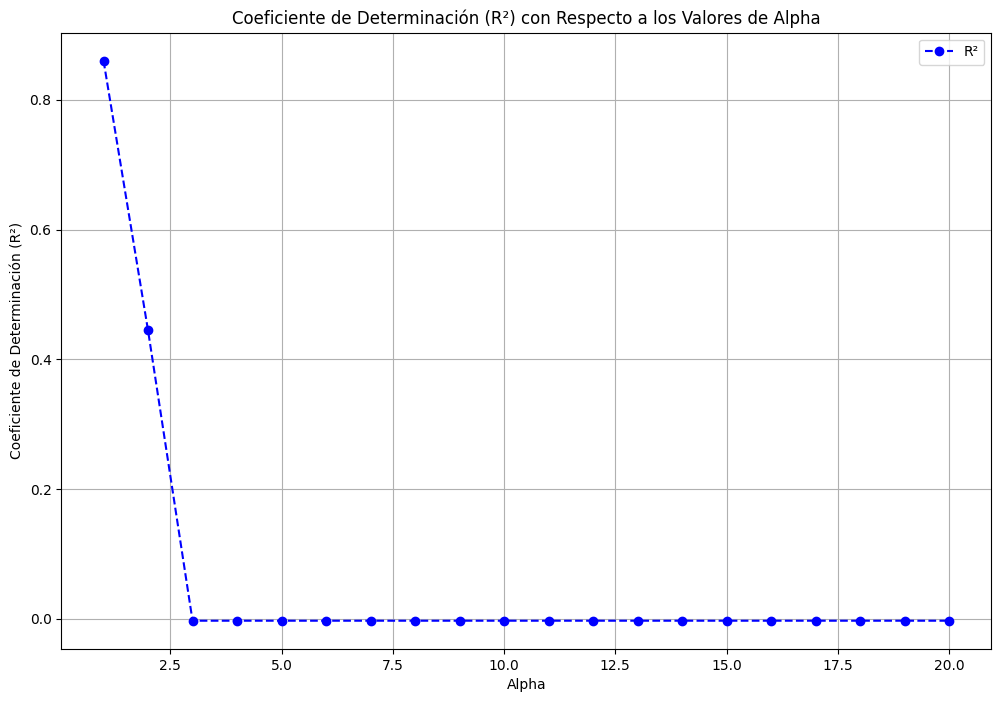

In [50]:
print("---------------(19). REGRESION LINEAL CON ALPHA ENTRE 1 Y 20--------------------\n")
# Lista para almacenar los resultados y los valores de R²
results = []
r2_values = []

# Bucle para variar alpha de 1 a 20
alphas = range(1, 21)

for alpha in alphas:
    # Crear el modelo Lasso con el valor de alpha actual
    reg_lasso = Lasso(alpha=alpha, max_iter=8000)
    
    # Entrenar el modelo
    reg_lasso.fit(X_train_sel, y_train)
    
    # Realizar predicciones
    y_pred = reg_lasso.predict(X_test_sel)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Almacenar los resultados
    results.append({'Alpha': alpha, 'MSE': mse, 'RMSE': rmse, 'R²': r2})
    r2_values.append(r2)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostrar la tabla de resultados
print(results_df)

# Graficar R² con respecto a los valores de alpha
plt.figure(figsize=(12, 8))
plt.plot(alphas, r2_values, marker='o', linestyle='--', color='b', label='R²')
plt.title('Coeficiente de Determinación (R²) con Respecto a los Valores de Alpha')
plt.xlabel('Alpha')
plt.ylabel('Coeficiente de Determinación (R²)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [37]:
# Definir la rejilla de parámetros 
parametros_griSearch = { 
    'alpha': [0.01, 0.1, 1, 10, 100, 1000], 
    'max_iter': [1000, 2000, 5000, 8000, 10000]
}
# Configurar GridSearchCV con el modelo Lasso 
grid_search = GridSearchCV(Lasso(), parametros_griSearch, cv=5)
grid_search.fit(X_train_sel, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [1000, 2000, 5000, 8000, 10000]})

In [52]:
print("------------(20). REGRESION LINEAL CON OPTIMIZACION GRIDSEARCH LASSO-------------\n")
# Mejor modelo encontrado por GridSearchCV 
mejor_modelo = grid_search.best_estimator_

# Predicciones y evaluación 
y_pred = mejor_modelo.predict(X_test_sel) 
mse_gridsearch = mean_squared_error(y_test, y_pred) 
rmse_gridsearch = np.sqrt(mse_gridsearch) 
r2_gridsearch = r2_score(y_test, y_pred) 
r2_gridsearch = r2_gridsearch * 100 

print(f"Mejores Parámetros (GridSearchCV): {grid_search.best_params_}") 
print(f"ERROR CUADRATICO MEDIO (MSE) ES: {mse_gridsearch}") 
print(f"ERROR CUADRATICO MEDIO DE LA RAIZ (RMSE) ES: {rmse_gridsearch}") 
print(f"COEFICIENTE DE DETERMINACION (R2) ES: {r2_gridsearch}")


------------(20). REGRESION LINEAL CON OPTIMIZACION GRIDSEARCH LASSO-------------

Mejores Parámetros (GridSearchCV): {'alpha': 0.01, 'max_iter': 1000}
ERROR CUADRATICO MEDIO (MSE) ES: 0.0022969507025486042
ERROR CUADRATICO MEDIO DE LA RAIZ (RMSE) ES: 0.04792651356554745
COEFICIENTE DE DETERMINACION (R2) ES: 99.97144215705673


In [46]:
print("------------(21). REGRESION LINEAL CON OPTIMIZACION RANDOMSEARCH LASSO-------------\n")

# Definir la distribución de parámetros
parametros_randomSearch = {
    'alpha': np.linspace(0.0001, 0.001, 10, 100, 1000),
    'max_iter': [1000, 2000, 5000, 8000, 10000]
}

# Configurar RandomizedSearchCV con el modelo Lasso
random_search = RandomizedSearchCV(Lasso(), parametros_randomSearch, n_iter=30, cv=5, random_state=42)
random_search.fit(X_train_sel, y_train)

# Mejor modelo encontrado por RandomizedSearchCV
best_model_rand = random_search.best_estimator_

# Predicciones y evaluación
y_pred_rand = best_model_rand.predict(X_test_sel)
mse_rand = mean_squared_error(y_test, y_pred_rand)
rmse_rand = np.sqrt(mse_rand)
r2_rand = r2_score(y_test, y_pred_rand) * 100

print(f"Mejores Parámetros (RandomizedSearchCV): {random_search.best_params_}")
print(f"ERROR CUADRATICO MEDIO (MSE) ES: {mse_rand}")
print(f"ERROR CUADRATICO MEDIO DE LA RAIZ (RMSE) ES: {rmse_rand}")
print(f"COEFICIENTE DE DETERMINACION (R2) ES: {r2_rand}")


------------(21). REGRESION LINEAL CON OPTIMIZACION RANDOMSEARCH LASSO-------------

Mejores Parámetros (RandomizedSearchCV): {'max_iter': 5000, 'alpha': np.float64(9.999999999999999e-05)}
ERROR CUADRATICO MEDIO (MSE) ES: 0.0020182087241509034
ERROR CUADRATICO MEDIO DE LA RAIZ (RMSE) ES: 0.04492447800643769
COEFICIENTE DE DETERMINACION (R2) ES: 99.97490773846077


In [56]:
# Datos
data = {
    'Modelo': ['Regresión lineal sin parametros', "Regulación Lasso Alpha=0.000001", "Optimizaciòn GridSearch", "Optimizaciòn RandomSearch"],
    'MSE': [mse_rl_sin_parametros, mse_rl_alpha000001, mse_gridsearch, mse_rand],
    'RMSE': [rmse_rl_sin_parametros, rmse_rl_alpha000001, rmse_gridsearch, rmse_rand],
    'R²': [r2_rl_sin_parametros, r2_rl_alpha000001, r2_gridsearch, r2_rand]
}

# Crear el DataFrame
resultados = pd.DataFrame(data)

# Mostrar el DataFrame
print(resultados)

                            Modelo       MSE      RMSE         R²
0  Regresión lineal sin parametros  0.001889  0.043465  99.976512
1  Regulación Lasso Alpha=0.000001  0.001888  0.043447  99.976531
2          Optimizaciòn GridSearch  0.002297  0.047927  99.971442
3        Optimizaciòn RandomSearch  0.002018  0.044924  99.974908


DE TODOS LOS MODELOS PROBADOS, ME QUEDO CON EL DE Lasso(alpha = 0.000001, max_iter=8000) YA QUE ME ARROJA UN R2 MUCHO MAS ALTO QUE LOS DEMAS.